# 项目六 朴素贝叶斯

## 项目实训

### 任务一 贝努利朴素贝叶斯实现天气预测

#### 1. 数据收集和分析

In [1]:
import numpy as np
# 将X，y赋值为np数组
X = np.array([[0, 1, 0, 1], 
              [1, 1, 1, 0], 
              [0, 1, 1, 0], 
              [0, 0, 0, 1], 
              [0, 1, 1, 0], 
              [0, 1, 0, 1], 
              [1, 0, 0, 1]])
y = np.array([0, 1, 1, 0, 1, 0, 0])
# 对不同分类计算每个特征为1的数量
counts = {}
for label in np.unique(y):     # np.unique()函数是去除数组中的重复数字,并进行排序之后输出
    counts[label] = X[y==label].sum(axis=0)
print("feature counts:\n{}".format(counts))

feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


#### 2. 创建贝努利朴素贝叶斯模型并进行天气预测

- 第一天的预测结果

In [2]:
# 导入贝努利贝叶斯
from sklearn.naive_bayes import BernoulliNB
# 使用贝努利贝叶斯拟合数据
clf = BernoulliNB()
clf.fit(X, y)
#要进行预测的这一天，没有刮北风，也不闷热
#但是多云，天气预报没有说有雨
next_day1 = [[0, 0, 1, 0]]
pred_day1 = clf.predict(next_day1)
if pred_day1[0] == 1:
    print('预测的这一天会下雨')
else:
    print('预测的这一天不下雨')

预测的这一天会下雨


In [3]:
# 模型预测分类的概率
pred_prob1 = clf.predict_proba(next_day1)
print('预测的这一天不下雨概率是{0:.2f}，会下雨的概率是{1:.2f}'.format(pred_prob1[0,0],pred_prob1[0,1]))

预测的这一天不下雨概率是0.14，会下雨的概率是0.86


#### 3. 预测并分析预测结果

- 第二天的预测结果

In [4]:
# 假设另外一天的数据如下：
next_day2 = [[1, 1, 0, 1]]
# 使用训练好的模型继续预测
pred_day2 = clf.predict(next_day2)
if pred_day2[0] == 1:
    print('预测的另一天会下雨')
else:
    print('预测的另一天不下雨')
# 模型预测分类的概率
pred_prob2 = clf.predict_proba(next_day2)
print('预测的另一天不下雨概率是{0:.2f}，会下雨的概率是{1:.2f}'.format(pred_prob2[0,0],pred_prob2[0,1]))

预测的另一天不下雨
预测的另一天不下雨概率是0.92，会下雨的概率是0.08


- 两天的测试样本预测结果
- predict_proba返回的是一个 n 行 k 列的数组， 第 i 行 第 j 列上的数值是模型预测 第 i 个预测样本为某个标签的概率，并且每一行的概率和为1。

In [5]:
pred_days = [[0,0,1,0], [1,1,0,1]]
print('两天的预测结果是：', clf.predict(pred_days))
print('两天的预测分类概率为：\n', clf.predict_proba(pred_days))

两天的预测结果是： [1 0]
两天的预测分类概率为：
 [[0.13848881 0.86151119]
 [0.92340878 0.07659122]]


### 任务二 高斯朴素贝叶斯实现连续值的分类

#### 1. 准备数据集并用BernoulliNB进行分类

In [6]:
# 导入数据集生成工具
from sklearn.datasets import make_blobs
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
# 导入贝努利贝叶斯
from sklearn.naive_bayes import BernoulliNB
# 生成样本数量为400，分类数为4的数据集
X, y = make_blobs(n_samples=400, centers=4, random_state=0)
# 将数据集拆分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
# 使用贝努利贝叶斯拟合数据
ber_nb = BernoulliNB()
ber_nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [7]:
print('贝努利模型得分：{:.3f}'.format(ber_nb.score(X_test, y_test)))

贝努利模型得分：0.450


- 绘制分类界限图

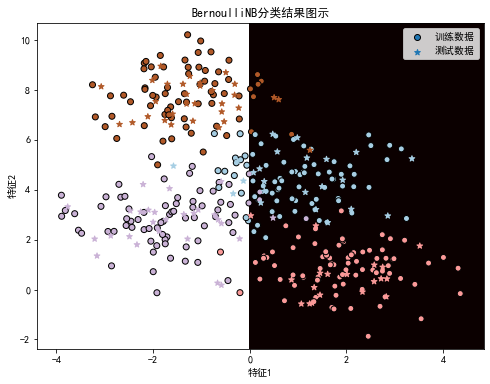

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']   # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号
# 限定横轴与纵轴的最大值、最小值
x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
# 生成网格坐标矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

plt.figure(figsize=(8,6))
# 预测数据的类别标签
z = ber_nb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
# 用不同的背景色表示不同的分类
plt.pcolormesh(xx, yy, z, cmap=plt.cm.hot)

# 将训练集和测试集用散点图表示
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Paired,
            edgecolors='k', label='训练数据')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired,
            marker='*', label='测试数据')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('BernoulliNB分类结果图示')
plt.legend()
plt.show()

#### 2. 使用高斯朴素贝叶斯模型进行分类

In [9]:
# 导入高斯贝叶斯
from sklearn.naive_bayes import GaussianNB
# 使用高斯贝叶斯拟合数据
gau_nb = GaussianNB()
gau_nb.fit(X_train, y_train)
print('高斯模型得分：{}'.format(gau_nb.score(X_test, y_test)))

高斯模型得分：0.92


- 绘制分类界限图

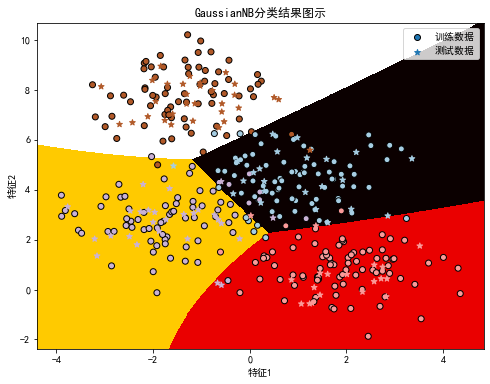

In [10]:
plt.figure(figsize=(8,6))
# 预测数据的类别标签
z = gau_nb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
# 用不同色块来表示不同的分类
plt.pcolormesh(xx, yy, z, cmap=plt.cm.hot)
# 将训练集和测试集用散点图表示
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', label='训练数据')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, marker='*', label='测试数据')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('GaussianNB分类结果图示')
plt.legend()
plt.show()

### 任务三 多项式朴素贝叶斯实现离散特征的分类

#### 1. 使用多项式朴素贝叶斯模型进行分类

In [11]:
# from sklearn.naive_bayes import MultinomialNB
# mul_nb = MultinomialNB()
# mul_nb.fit(X_train, y_train)
#################################
# ValueError: Input X must be non-negative

In [12]:
# 导入多项式朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
# 导入数据处理工具MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# 使用MinMaxScaler对数据进行离差标准化预处理，使数据全部为非负值[0,1]
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 用多项式朴素贝叶斯拟合经过预处理之后的数据
mul_nb = MultinomialNB()
mul_nb.fit(X_train_scaled, y_train)
print('多项式模型得分：{:.3f}'.format(mul_nb.score(X_test_scaled, y_test)))

多项式模型得分：0.450


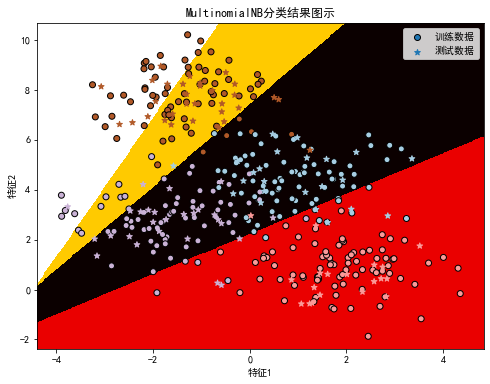

In [13]:
plt.figure(figsize=(8,6))
# 预测数据的类别标签
z_scaled = scaler.transform(np.c_[(xx.ravel(), yy.ravel())])
z = mul_nb.predict(z_scaled).reshape(xx.shape)
# 用不同色块来表示不同的分类
plt.pcolormesh(xx, yy, z, cmap=plt.cm.hot)
# 将训练集和测试集用散点图表示
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', label='训练数据')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, marker='*', label='测试数据')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('MultinomialNB分类结果图示')
plt.legend()
plt.show()

- 哑变量处理：把X_tiain转换成分类型数据
    - 注意X_train没有经过归一化，因为做哑变量之后自然所有的数据就不会又负数了

#### 2. 数值离散化处理后重新拟合模型进行分类

In [14]:
from sklearn.preprocessing import KBinsDiscretizer
# KBinsDiscretizer类将连续型变量排序后按顺序分箱后编码
kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(X_train)
# 进行数值离散化处理
X_train_bins = kbs.transform(X_train)
X_test_bins = kbs.transform(X_test)
mul_nb = MultinomialNB().fit(X_train_bins, y_train)
y_pred = mul_nb.predict(X_test_bins)
print('离散化处理后多项式模型得分：{:.3f}'.format(mul_nb.score(X_test_bins, y_test)))

离散化处理后多项式模型得分：0.930


- 绘制分类界限图

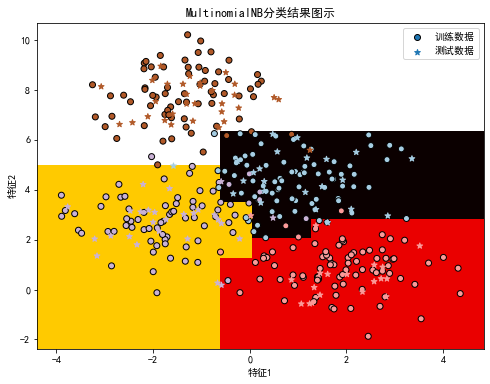

In [15]:
plt.figure(figsize=(8,6))
# 测试数据
z_data = np.c_[(xx.ravel(), yy.ravel())]
# 将测试数据进行离散化处理
z_bins = kbs.transform(z_data)
# 预测数据的类别标签
z = mul_nb.predict(z_bins).reshape(xx.shape)
# 用不同色块来表示不同的分类
plt.pcolormesh(xx, yy, z, cmap=plt.cm.hot)
# 将训练集和测试集用散点图表示
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Paired,
            edgecolors='k', label='训练数据')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired,
            marker='*', label='测试数据')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('MultinomialNB分类结果图示')
plt.legend()
plt.show()

## 项目拓展
### 朴素贝叶斯实战——估算个人年收入等级

### 1. 数据准备

In [16]:
# 读取数据
import pandas as pd
# 用pandas打开csv文件
df = pd.read_csv('adult.csv', header=None, index_col=False,
                  names=['年龄','单位性质','权重','学历','受教育时长',
                        '婚姻状况','职业','家庭情况','种族','性别',
                        '资产所得','资产损失','周工作时长','原籍',
                        '收入'])
print('adult文件的数据形态：', df.shape)
print('输出数据的前5行：')
display(df.head())

adult文件的数据形态： (32561, 15)
输出数据的前5行：


,年龄,单位性质,权重,学历,受教育时长,婚姻状况,职业,家庭情况,种族,性别,资产所得,资产损失,周工作时长,原籍,收入
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df.groupby(by='收入').agg({'收入': 'count'})

,收入
收入,
<=50K,24720
>50K,7841


- 统计收入<=50K、收入>50K的样本数量

In [18]:
# 根据‘收入’进行分组
group_income = df.groupby(by='收入')
# 收入<=50K的分组
income_lessthan50k = dict([x for x in group_income])[' <=50K']
# 收入>50K的分组
income_morethan50k = dict([x for x in group_income])[' >50K']
print('收入 <=50K 的样本数量：', income_lessthan50k.shape[0])
print('收入 >50K 的样本数量：', income_morethan50k.shape[0])

收入 <=50K 的样本数量： 24720
收入 >50K 的样本数量： 7841


- 选取收入<=50K的10000个样本、收入>50K的7841个样本构成数据集

In [19]:
# 合并数据分组并排序
data = pd.concat([income_lessthan50k[:10000], income_morethan50k], axis=0)
data = data.sort_index()
print('数据集形态：', data.shape)
print('输出数据集前10行：')
display(data[:10])

数据集形态： (17841, 15)
输出数据集前10行：


,年龄,单位性质,权重,学历,受教育时长,婚姻状况,职业,家庭情况,种族,性别,资产所得,资产损失,周工作时长,原籍,收入
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### 2. 将数据集进行数据转换并编码处理
- 将数据集中的字符串数据转换为数值数据，同时需要保留原有的数值数据

#### 标记编码方法

In [20]:
from sklearn.preprocessing import LabelEncoder
# 定义一个标记编码器
label_encoder = LabelEncoder()
# 创建一些标记
input_classes = ['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']
# 为这些标记编码
label_encoder.fit(input_classes)
# 输出编码结果
print('Class mapping:')
for i, item in enumerate(label_encoder.classes_):
    print(item, '-->', i)

Class mapping:
audi --> 0
bmw --> 1
ford --> 2
toyota --> 3


In [21]:
# 用编码器转换一组标记
labels = ['toyota', 'ford', 'audi']
encoded_labels = label_encoder.transform(labels)
print('Labels = ', labels)
print('Encoded labels = ', list(encoded_labels))

Labels =  ['toyota', 'ford', 'audi']
Encoded labels =  [3, 2, 0]


In [22]:
label_encoder.inverse_transform(encoded_labels)

array(['toyota', 'ford', 'audi'], dtype='<U6')

#### 对数据集进行标记编码

In [23]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 定义一个用于标签编码的函数
def get_data_encoded(data):
    # 将数据全部转为字符类型
    data = np.array(data.astype(str))
    # 定义标记编码器对象列表
    encoder_list = []
    # 准备一个数组存储数据集编码后的结果
    data_encoded = np.empty(data.shape)
    # 将字符串转换为数值数据
    for i, item in enumerate(data[0]):
        # 判断该特征向量是否为数值数据
        if item.isdigit():
            data_encoded[:, i] = data[:, i]
        # 如果不是数值数据则进行标记编码
        else:
            # 将所有的标记编码器保存在列表中，以便在后面测试数据时使用
            encoder_list.append(LabelEncoder())
            # 将字符串数据的特征列逐个进行编码
            data_encoded[:, i] = encoder_list[-1].fit_transform(data[:, i])
    
    # 返回数据编码结果和编码器列表
    return data_encoded, encoder_list

data_encoded, encoder_list = get_data_encoded(data)
# 将编码处理完成的数据集拆分成特征矩阵X和类别标签y
X = data_encoded[:, :-1].astype(int)
# 数据集最后一列“收入”作为分类的类别标签，‘<=50K’为0，‘>50K’为1
y = data_encoded[:, -1].astype(int)

print('编码处理完成的数据集')
print('特征形态：{}，标签形态：{}'.format(X.shape, y.shape))

编码处理完成的数据集
特征形态：(17841, 14)，标签形态：(17841,)


### 3. 使用高斯朴素贝叶斯进行建模

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
# 对数值进行预处理
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用高斯朴素贝叶斯拟合数据
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
# 打印模型评分
print('训练集得分：{:.3f}'.format(gnb.score(X_train_scaled, y_train)))
print('测试集得分：{:.3f}'.format(gnb.score(X_test_scaled, y_test)))

训练集得分：0.713
测试集得分：0.720


### 4. 用模型进行预测

In [25]:
# 从数据文件里选择样本做测试
test = income_lessthan50k[10000:10003]
print('选取测试样本：')
display(test)

选取测试样本：


,年龄,单位性质,权重,学历,受教育时长,婚姻状况,职业,家庭情况,种族,性别,资产所得,资产损失,周工作时长,原籍,收入
13140,49,Private,218357,Assoc-voc,11,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,38,United-States,<=50K
13141,28,Self-emp-not-inc,107236,12th,8,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
13142,31,Private,138416,5th-6th,3,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,56,Mexico,<=50K


In [26]:
# 将测试样本与原数据集进行合并
data_all = pd.concat([data, test])
data_all

,年龄,单位性质,权重,学历,受教育时长,婚姻状况,职业,家庭情况,种族,性别,资产所得,资产损失,周工作时长,原籍,收入
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K
13140,49,Private,218357,Assoc-voc,11,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,38,United-States,<=50K
13141,28,Self-emp-not-inc,107236,12th,8,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [27]:
# 调用标记编码函数进行数据编码
data_all_encoded, encoder_list = get_data_encoded(data_all)
data_all_encoded.astype(int)

array([[    39,      7,  77516, ...,     40,     38,      0],
       [    50,      6,  83311, ...,     13,     38,      0],
       [    38,      4, 215646, ...,     40,     38,      0],
       ...,
       [    49,      4, 218357, ...,     38,     38,      0],
       [    28,      6, 107236, ...,     40,     38,      0],
       [    31,      4, 138416, ...,     56,     25,      0]])

In [28]:
# 取出最后3个已经编码的测试数据
test_encoded = data_all_encoded[-3:].astype(int)
print('打印编码转换后的测试数据：\n', test_encoded)

打印编码转换后的测试数据：
 [[    49      4 218357      8     11      0     10      1      4      0
       0      0     38     38      0]
 [    28      6 107236      2      8      2      3      1      4      1
       0      0     40     38      0]
 [    31      4 138416      4      3      2      6      0      4      1
       0      0     56     25      0]]


In [29]:
# 获取测试样本的特征数据X和分类y
test_encoded_X = test_encoded[:,:-1]
test_encoded_y = test_encoded[:, -1]
print('测试样本的特征数据X：\n', test_encoded_X)
print('\n测试样本的收入等级：', test_encoded_y)

测试样本的特征数据X：
 [[    49      4 218357      8     11      0     10      1      4      0
       0      0     38     38]
 [    28      6 107236      2      8      2      3      1      4      1
       0      0     40     38]
 [    31      4 138416      4      3      2      6      0      4      1
       0      0     56     25]]

测试样本的收入等级： [0 0 0]


In [30]:
# 将编码后的特征数据X标准化
test_encoded_X_scaled = scaler.transform(test_encoded_X)
test_encoded_X_scaled

array([[ 0.6837246 ,  0.06764227,  0.27108273, -0.68686445,  0.19883056,
        -1.78190512,  0.77537167, -0.16809616,  0.37674225, -1.58428802,
        -0.18558429, -0.24674938, -0.30853616,  0.29064221],
       [-0.9088291 ,  1.44940354, -0.79163934, -2.33469873, -0.95483503,
        -0.3417426 , -0.8905604 , -0.16809616,  0.37674225,  0.63119836,
        -0.18558429, -0.24674938, -0.14480586,  0.29064221],
       [-0.68132143,  0.06764227, -0.49344481, -1.78542064, -2.87761102,
        -0.3417426 , -0.17658951, -0.77927189,  0.37674225,  0.63119836,
        -0.18558429, -0.24674938,  1.16503651, -1.40860509]])

In [31]:
# 对数据进行预测分类标签
pred_encoded_y = gnb.predict(test_encoded_X_scaled)
print('测试样本的预测分类为：', pred_encoded_y)
# 对分类标签进行解码，转换成原来的数据形式
pred_y = encoder_list[-1].inverse_transform(pred_encoded_y)
print('预测的收入等级：', pred_y)

测试样本的预测分类为： [0 0 0]
预测的收入等级： [' <=50K' ' <=50K' ' <=50K']
